In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import os
import sys
import random
import datetime
# import opendatasets as od

In [2]:
import plotly
import plotly.express as px
import plotly.io as pio
import seaborn as sns

In [5]:
# od.download("https://www.kaggle.com/parulpandey/forbes-highest-paid-athletes-19902019")

In [6]:
df = pd.read_csv("forbes-highest-paid-athletes-19902019/Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv")

In [7]:
df.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


In [9]:
df.columns = [x.lower() for x in df.columns]
df.rename(columns={"current rank": "current_rank", "previous year rank":"prev_rank", "earnings ($ million)":"earnings"}, 
         inplace=True)

#### All unique sports in the sport column





In [10]:
sports = df.sport.unique().tolist()
sports

['boxing',
 'auto racing',
 'golf',
 'basketball',
 'Basketball',
 'Boxing',
 'Auto Racing',
 'Golf',
 'Tennis',
 'NFL',
 'Auto racing',
 'NBA',
 'Baseball',
 'Ice Hockey',
 'American Football / Baseball',
 'tennis',
 'ice hockey',
 'F1 Motorsports',
 'NASCAR',
 'Hockey',
 'Auto Racing (Nascar)',
 'F1 racing',
 'American Football',
 'soccer',
 'baseball',
 'cycling',
 'motorcycle gp',
 'Soccer',
 'MMA']

In [11]:
# Basketball to basketball
# Ice hockey to ice hockey
# boxing Boxing
# Auto Racing to Auto racing
# Golf to golf
# Soccer to soccer
# Tennis to tennis
# Baseball to baseball
# F1 Motorsports to F1 racing
# Auto Racing (NASCAR) to NASCAR

In [12]:
for x in df[df["sport"]=="Basketball"].index.tolist():
    df.loc[x, "sport"] = "basketball"

In [13]:
for x in df[df["sport"]=="Ice Hockey"].index.tolist():
    df.loc[x, "sport"] = "ice hockey"

In [14]:
for x in df[df["sport"]=="Boxing"].index.tolist():
    df.loc[x, "sport"] = "boxing"

In [15]:
for x in df[df["sport"]=="Auto Racing"].index.tolist():
    df.loc[x, "sport"] = "Auto racing"

In [16]:
for x in df[df["sport"]=="Golf"].index.tolist():
    df.loc[x, "sport"] = "golf"

In [17]:
for x in df[df["sport"]=="Soccer"].index.tolist():
    df.loc[x, "sport"] = "soccer"

In [18]:
for x in df[df["sport"]=="Baseball"].index.tolist():
    df.loc[x, "sport"] = "baseball"

In [19]:
for x in df[df["sport"]=="Tennis"].index.tolist():
    df.loc[x, "sport"] = "tennis"

In [20]:
for x in df[df["sport"]=="F1 Motorsports"].index.tolist():
    df.loc[x, "sport"] = "F1 racing"

In [21]:
for x in df[df["sport"]=="Auto Racing (Nascar)"].index.tolist():
    df.loc[x, "sport"] = "NASCAR"

In [22]:
df.sport.unique().tolist()

['boxing',
 'auto racing',
 'golf',
 'basketball',
 'Auto racing',
 'tennis',
 'NFL',
 'NBA',
 'baseball',
 'ice hockey',
 'American Football / Baseball',
 'F1 racing',
 'NASCAR',
 'Hockey',
 'American Football',
 'soccer',
 'cycling',
 'motorcycle gp',
 'MMA']

#### Different countries with different number of athletes representing them in the dataframe

In [23]:
different_countries = df["nationality"].unique().tolist()

In [24]:
different_countries

['USA',
 'Brazil',
 'France',
 'Australia',
 'Canada',
 'UK',
 'Austria',
 'Germany',
 'Russia',
 'Italy',
 'Finland',
 'Switzerland',
 'Philippines',
 'Portugal',
 'Dominican',
 'Argentina',
 'Filipino',
 'Spain',
 'Serbia',
 'Northern Ireland',
 'Ireland',
 'Mexico']

In [25]:
countries_repr = pd.DataFrame({"nation":different_countries})

In [26]:
countries_repr["representatives"] = [len(df[df["nationality"]==x]["name"].unique().tolist()) for x in different_countries]

In [27]:
countries_repr

,nation,representatives
0,USA,56
1,Brazil,3
2,France,1
3,Australia,1
4,Canada,4
5,UK,3
6,Austria,1
7,Germany,1
8,Russia,1
9,Italy,1


#### Top 10 athletes with the most occurences in Forbes list

In [28]:
top_ten = df[["name", "sport", "nationality"]].value_counts().nlargest(10).reset_index()
top_ten.rename(columns={"count":"name", 0:"count"}, inplace=True)
top_ten

,name,sport,nationality,count
0,Michael Jordan,basketball,USA,19
1,Tiger Woods,golf,USA,19
2,Kobe Bryant,basketball,USA,14
3,LeBron James,basketball,USA,13
4,Roger Federer,tennis,Switzerland,12
5,Phil Mickelson,golf,USA,11
6,Michael Schumacher,F1 racing,Germany,10
7,Cristiano Ronaldo,soccer,Portugal,10
8,David Beckham,soccer,UK,9
9,Lionel Messi,soccer,Argentina,9


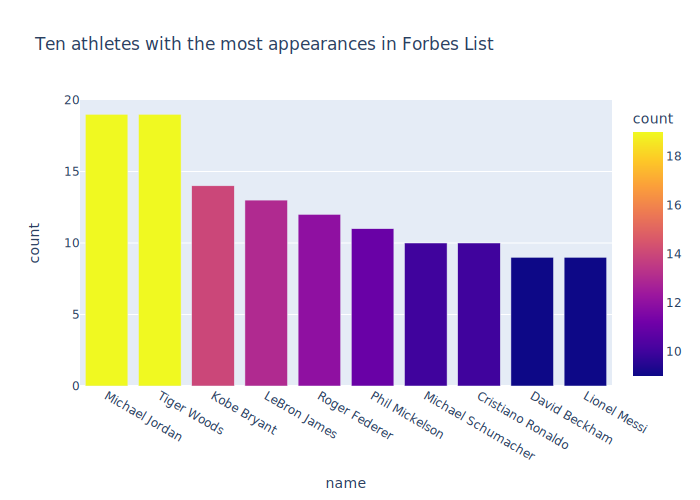

In [29]:
fig = px.bar(top_ten, x="name", y="count", title="Ten athletes with the most appearances in Forbes List", 
       color="count")
fig.show(renderer="svg")

#### Highest earnings (year wise)

In [30]:
highest_earnings = df.groupby(["year"])["earnings"].max().reset_index().merge(df, on=["year", "earnings"])
highest_earnings_df = highest_earnings[["name", "year", "nationality", "sport", "earnings"]]

In [31]:
highest_earnings_df

,name,year,nationality,sport,earnings
0,Mike Tyson,1990,USA,boxing,28.6
1,Evander Holyfield,1991,USA,boxing,60.5
2,Michael Jordan,1992,USA,basketball,35.9
3,Michael Jordan,1993,USA,basketball,36.0
4,Michael Jordan,1994,USA,basketball,30.0
5,Michael Jordan,1995,USA,basketball,43.9
6,Mike Tyson,1996,USA,boxing,75.0
7,Michael Jordan,1997,USA,basketball,78.3
8,Michael Jordan,1998,USA,basketball,69.0
9,Michael Schumacher,1999,Germany,Auto racing,49.0


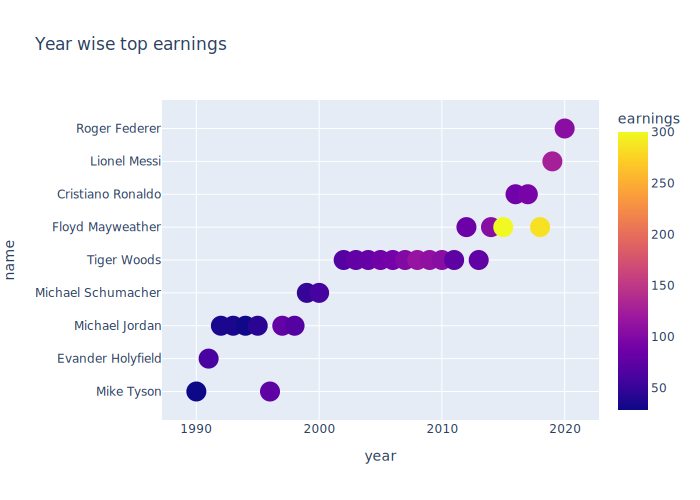

In [39]:
fig = px.scatter(highest_earnings_df, x="year", y="name", color="earnings", title="Year wise top earnings")
fig.update_traces(marker=dict(size=20))
fig.show(renderer="svg")

#### Most representatives (sports wise)

In [33]:
sports_repr_df = pd.DataFrame({"sport":df.sport.unique().tolist()})

In [34]:
sports_repr_df["representatives"] = [len(df[df["sport"]==x]["name"].unique().tolist()) for x in df.sport.unique().tolist()]

In [35]:
sports_repr_df.sort_values(by="representatives", axis=0, ascending=False, inplace=True)

In [36]:
sports_repr_df.reset_index(inplace=True, drop=True)

In [37]:
sports_repr_df

,sport,representatives
0,American Football,15
1,boxing,14
2,basketball,12
3,golf,8
4,Auto racing,7
5,tennis,6
6,soccer,5
7,auto racing,5
8,baseball,3
9,NASCAR,3


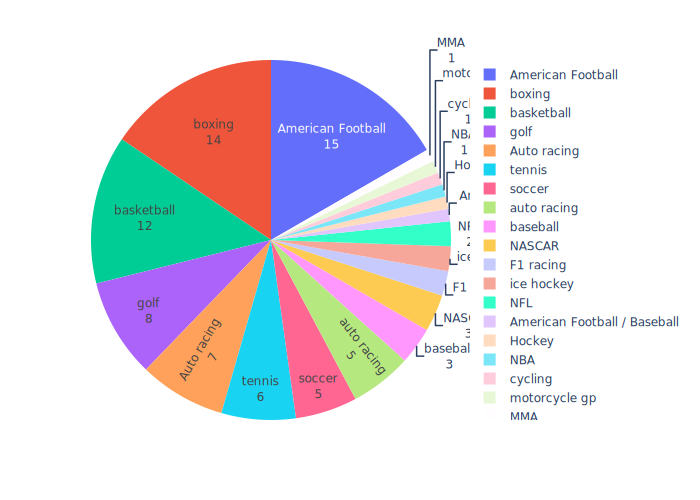

In [40]:
fig = px.pie(sports_repr_df, values="representatives", names="sport")
fig.update_traces(textinfo='value+label', hoverinfo='label')
fig.show(renderer="svg")